In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.12.0'

In [3]:
hello  = tf.constant('Hello ')

In [4]:
world = tf.constant('World')

In [5]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [6]:
with tf.Session() as sess:
  print(sess.run(hello+world))

b'Hello World'


In [7]:
a = tf.constant(10)
b = tf.constant(20)

In [8]:
with tf.Session() as sess:
  result = sess.run(a + b)

print(result)

30


In [9]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))
myrandn = tf.random_normal((4,4))
myrandu = tf.random_uniform((4,4),maxval=1,minval=0)

myops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

In [10]:
sess = tf.InteractiveSession()

In [11]:
for op in myops:
    print(op.eval())
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.14760329  0.38658708 -1.7206608   0.39363798]
 [ 0.09704172 -1.8281692   0.57814455 -0.4315584 ]
 [-1.1403309  -0.20167829 -1.0012054  -1.7395586 ]
 [-0.58475536 -1.4322966   0.39968753  0.4705368 ]]


[[0.05331802 0.77184    0.6612109  0.7026863 ]
 [0.5734465  0.58341455 0.16081798 0.57119703]
 [0.88092875 0.9215746  0.3956728  0.19521773]
 [0.41195202 0.0557512  0.97056866 0.72495604]]




In [12]:
a = tf.constant([[1,2],
                [3,4]])
print(a.get_shape())
print(a.eval())

(2, 2)
[[1 2]
 [3 4]]


In [13]:
b = tf.constant([[10],[100]])
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [14]:
tf.matmul(a,b).eval()

array([[210],
       [430]])

## TF Graphs

In [15]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [16]:
n3 = n1+n2

In [17]:
n3.eval()

3

In [18]:
print(tf.get_default_graph())

In [19]:
g = tf.Graph()
print(g)

In [20]:
graph_one = tf.get_default_graph()
print(graph_one)
graph_two = tf.Graph()
print(graph_two)

In [21]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


## Variables and Placeholders

In [22]:
my_tensor = tf.random_uniform((4,4),0,1)

In [23]:
my_tensor.eval()

array([[0.6898351 , 0.5405178 , 0.15310931, 0.7411468 ],
       [0.250548  , 0.18956888, 0.8006084 , 0.28701055],
       [0.22525144, 0.9005691 , 0.04545653, 0.6469873 ],
       [0.12956524, 0.40337265, 0.47791636, 0.7759243 ]], dtype=float32)

In [24]:
my_var = tf.Variable(initial_value=my_tensor)

In [25]:
# my_var.eval() # get an error

In [26]:
init =  tf.global_variables_initializer()

In [27]:
sess.run(init)

In [28]:
sess.run(my_var)

array([[0.31599295, 0.9624398 , 0.63699365, 0.7027962 ],
       [0.95751786, 0.9400265 , 0.21654606, 0.21654153],
       [0.74742293, 0.84709203, 0.35884738, 0.68150425],
       [0.42200315, 0.08245122, 0.00492656, 0.97060287]], dtype=float32)

In [29]:
ph = tf.placeholder(tf.float32,shape=(None,5))

## TF NNetwork I

In [30]:
import numpy as np
import tensorflow as tf

In [31]:
np.random.seed(101)
tf.set_random_seed(101)

In [32]:
rand_a = np.random.uniform(0,100,(5,5))
print(rand_a)
rand_b = np.random.uniform(0,100,(5,1))
print(rand_b)

[[51.63986277 57.06675869  2.84742265 17.15216562 68.52769817]
 [83.38968626 30.69662197 89.36130797 72.15438618 18.99389542]
 [55.42275911 35.2131954  18.18924027 78.56017619 96.54832224]
 [23.23536618  8.35614337 60.35484223 72.89927573 27.62388285]
 [68.53063288 51.78674742  4.84845374 13.78692376 18.69674261]]
[[99.43179012]
 [52.06653967]
 [57.87895355]
 [73.48190583]
 [54.19617722]]


In [33]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [34]:
add_op = a + b
mul_op = a * b

In [35]:
with tf.Session() as sess:    
    add_result = sess.run(add_op, feed_dict = {a:rand_a, b:rand_b})
    print(add_result)
    print('\n')
    mult_result = sess.run(mul_op, feed_dict = {a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## TF NNetwork II
### Example NN

In [18]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32,shape=(None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [20]:
a = tf.sigmoid(z) # activation function

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [25]:
print(layer_out)

[[0.95683    0.81922567 0.5244749 ]]


## Simple Regression Example

In [30]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(x_data)

y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
print(y_label)

[-0.17289561  2.24387308  3.57001461  3.26783558  4.32780247  5.96742265
  6.14049066  6.63051206  7.54219188 10.41297596]
[0.93679768 1.62189237 2.67752533 3.10704016 4.91423045 4.68304005
 7.14644022 7.86664797 9.63445    8.78127057]


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

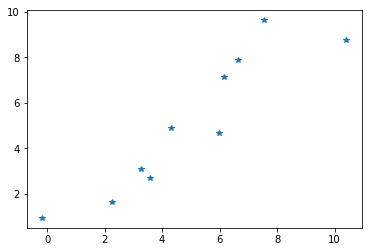

In [33]:
plt.plot(x_data,y_label,"*")

y = mx + b # Simple Regression
m : Intercept
x : Independent Variable
b : Bias term or error
y : Dependent or Predictor

In [36]:
np.random.rand(2)

array([0.78452185, 0.68724204])

In [37]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [41]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2 # minimize the error

In [42]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [43]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 1
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

In [55]:
x_test = np.linspace(-1,11,10)

# y = mx+b
y_pred_plot = final_slope*x_test + final_intercept

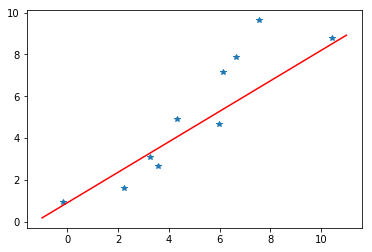

In [56]:
plt.plot(x_data,y_label,'*')
plt.plot(x_test,y_pred_plot,'r')

## TF Regression P - I
### Using Pandas Dataframe and tf.estimator!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [6]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 1.5502999 , -0.37507943,  1.43180894, ...,  1.37340219,
       -0.52201517, -0.95505739])

y = mx + b
,b = 5

In [7]:
y_true = (0.5*x_data)+5 +noise

In [54]:
x_df = pd.DataFrame(data=x_data,columns=['X_Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [55]:
my_data = pd.concat([x_df,y_df],axis=1)

In [56]:
my_data.head()

,X_Data,Y
0,0.00000,4.907251
1,0.00001,5.182435
2,0.00002,4.385905
3,0.00003,3.644242
4,0.00004,4.874950


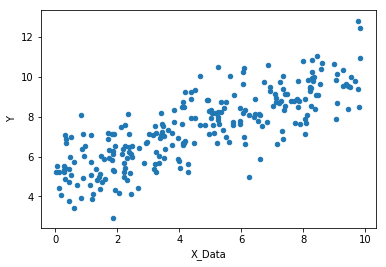

In [16]:
my_data.sample(n=250).plot(kind='scatter',x='X_Data',y='Y')

In [19]:
np.random.randn(2)

array([ 0.545825  , -0.55152892])

In [20]:
batch_size = 8
m = tf.Variable(0.54)
b = tf.Variable(-0.55)

In [22]:
xph = tf.placeholder(tf.float32,shape=[batch_size])
yph = tf.placeholder(tf.float32,shape=[batch_size])

In [24]:
y_model = m*xph + b

error =  tf.reduce_sum(tf.square(yph-y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train_model = optimizer.minimize(error)

In [25]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size) # random index
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]} # feed data
        
        sess.run(train_model, feed_dict = feed)
    
    model_intercept, model_slope = sess.run([m,b])

In [45]:
print(f'Intercept: {0}',model_intercept)
print(f'Bias: {0}',model_slope)

Intercept: 0 0.51394236
Bias: 0 5.0608683


In [37]:
y_hat = x_data*model_intercept + model_slope

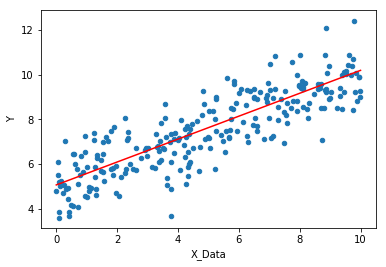

In [38]:
my_data.sample(n=250).plot(kind='scatter',x='X_Data',y='Y')
plt.plot(x_data,y_hat,'r')

## TF Regression P - II

## TF ESTIMATOR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [27]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [28]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols) # tensor estimator

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Windows\\TEMP\\tmpzie8nt1c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000F1C0390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [31]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                                batch_size=8, num_epochs=None, shuffle=True)

In [32]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, 
                                                      batch_size=8, num_epochs=1000, shuffle=False)

In [33]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval,
                                                     batch_size=8, num_epochs=1000, shuffle=False)


## Train estimator

In [34]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Windows\TEMP\tmpzie8nt1c\model.ckpt.
INFO:tensorflow:loss = 483.57928, step = 1
INFO:tensorflow:global_step/sec: 1265.7
INFO:tensorflow:loss = 15.079034, step = 101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1723.97
INFO:tensorflow:loss = 17.483707, step = 201 (0.058 sec)
INFO:tensorflow:global_step/sec: 1694.74
INFO:tensorflow:loss = 21.332853, step = 301 (0.058 sec)
INFO:tensorflow:global_step/sec: 1785.54
INFO:tensorflow:loss = 10.348291, step = 401 (0.057 sec)
INFO:tensorflow:global_step/sec: 1723.97
INFO:tensorflow:loss = 11.711363, step = 501 (0.058 sec)
INFO:tensorflow:global_step/sec: 1587.14
INFO:tensorflow:loss 

## Evaluation

In [36]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-10:07:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpzie8nt1c\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-19-10:07:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0464522, global_step = 1000, label/mean = 7.4899263, loss = 8.371617, prediction/mean = 7.407099
INFO:tensorflow:Saving 'checkpoint_path' summary for globa

In [37]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-10:07:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpzie8nt1c\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-19-10:07:58
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0657746, global_step = 1000, label/mean = 7.478543, loss = 8.5261965, prediction/mean = 7.3859887
INFO:tensorflow:Saving 'checkpoint_path' summary for glob

## Prediction

In [47]:
print(f'TRAINING DATA METRICS:\n',train_metrics)
print(f'EVAL METRICS:\n',eval_metrics)

TRAINING DATA METRICS:
 {'average_loss': 1.0464522, 'label/mean': 7.4899263, 'loss': 8.371617, 'prediction/mean': 7.407099, 'global_step': 1000}
EVAL METRICS:
 {'average_loss': 1.0657746, 'label/mean': 7.478543, 'loss': 8.5261965, 'prediction/mean': 7.3859887, 'global_step': 1000}


In [48]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [50]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpzie8nt1c\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.484321], dtype=float32)},
 {'predictions': array([5.133535], dtype=float32)},
 {'predictions': array([5.782749], dtype=float32)},
 {'predictions': array([6.4319625], dtype=float32)},
 {'predictions': array([7.0811768], dtype=float32)},
 {'predictions': array([7.7303905], dtype=float32)},
 {'predictions': array([8.379604], dtype=float32)},
 {'predictions': array([9.028818], dtype=float32)},
 {'predictions': array([9.678032], dtype=float32)},
 {'predictions': array([10.327246], dtype=float32)}]

In [51]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpzie8nt1c\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [52]:
predictions

[array([4.484321], dtype=float32),
 array([5.133535], dtype=float32),
 array([5.782749], dtype=float32),
 array([6.4319625], dtype=float32),
 array([7.0811768], dtype=float32),
 array([7.7303905], dtype=float32),
 array([8.379604], dtype=float32),
 array([9.028818], dtype=float32),
 array([9.678032], dtype=float32),
 array([10.327246], dtype=float32)]

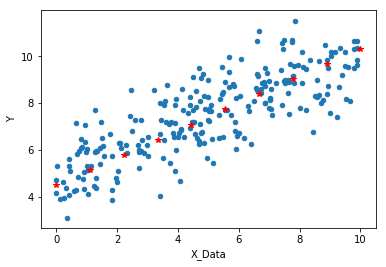

In [68]:
my_data.sample(n=250).plot(kind='scatter',x="X_Data",y='Y')
plt.plot(brand_new_data,predictions,'r*')

# TF Classification Example P - I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: ( x - x.min() ) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc= tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group  = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

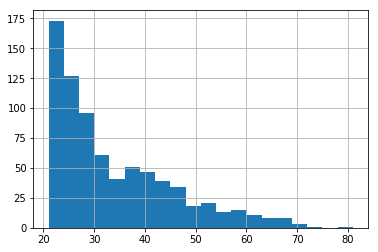

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80]) #Convert into Categorical columns

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [18]:
# Train Test Split

In [19]:
x_data = diabetes.drop('Class',axis=1)
label = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, label, test_size=0.3, random_state=101)

## TF Classification P - II

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Windows\\TEMP\\tmpj0ygzkta', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000056FE400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn=input_func,steps=1000) # train the model

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Windows\TEMP\tmpj0ygzkta\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 357.107
INFO:tensorflow:loss = 4.6663637, step = 101 (0.285 sec)
INFO:tensorflow:global_step/sec: 680.202
INFO:tensorflow:loss = 4.6575165, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 694.375
INFO:tensorflow:loss = 4.1643753, step = 301 (0.144 sec)
INFO:tensorflow:global_step/sec: 694.376
INFO:tensorflow:loss = 3.9414144, step = 401 (0.142

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=True)

In [26]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-10:45:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpj0ygzkta\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-19-10:45:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80530864, auc_precision_recall = 0.6517664, average_loss = 0.5220353, global_step = 1000, label/mean = 0.35064936, loss = 5.0245895, precision = 0.6666667, prediction/mean = 0.35447598, recall = 0.5185185
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Windows\TEMP\tmpj0ygzkta\model.ckpt-1000


In [27]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80530864,
 'auc_precision_recall': 0.6517664,
 'average_loss': 0.5220353,
 'label/mean': 0.35064936,
 'loss': 5.0245895,
 'precision': 0.6666667,
 'prediction/mean': 0.35447598,
 'recall': 0.5185185,
 'global_step': 1000}

In [28]:
pred_inpu_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=True)

In [37]:
predictions = model.predict(pred_inpu_func)

In [38]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpj0ygzkta\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
my_pred

[{'logits': array([0.78851223], dtype=float32),
  'logistic': array([0.6875118], dtype=float32),
  'probabilities': array([0.31248823, 0.6875118 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.8473282], dtype=float32),
  'logistic': array([0.70000637], dtype=float32),
  'probabilities': array([0.29999363, 0.70000637], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.1085699], dtype=float32),
  'logistic': array([0.24813762], dtype=float32),
  'probabilities': array([0.75186235, 0.2481376 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.4424412], dtype=float32),
  'logistic': array([0.19116761], dtype=float32),
  'probabilities': array([0.8088324, 0.1911676], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': 

## DNN Model

In [43]:
dnn_model  = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Windows\\TEMP\\tmpp9nhh70t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000011176B38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

originally defined at:
  File "C:\Users\manish.singh04\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\estimator\canned\dnn.py", line 108, in dnn_logit_fn
    name='dnn')
  File "C:\Users\manish.singh04\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\estimator\canned\dnn.py", line 143, in __init__
    create_scope_now=False)
  File "C:\Users\manish.singh04\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\feature_column\feature_column.py", line 323, in __init__
    self._name, _internal_input_layer, create_scope_now_=create_scope_now)
  File "C:\Users\manish.singh04\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\template.py", line 154, in make_template
    **kwargs)


In [49]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket] #reset the columns

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

dnn_model  = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Windows\\TEMP\\tmpb6kk9f0r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000012938240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [50]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Windows\TEMP\tmpb6kk9f0r\model.ckpt.
INFO:tensorflow:loss = 7.495522, step = 1
INFO:tensorflow:global_step/sec: 418.368
INFO:tensorflow:loss = 6.1780634, step = 101 (0.244 sec)
INFO:tensorflow:global_step/sec: 719.353
INFO:tensorflow:loss = 3.9729981, step = 201 (0.136 sec)
INFO:tensorflow:global_step/sec: 735.221
INFO:tensorflow:loss = 3.569596, step = 301 (0.140 sec)
INFO:tensorflow:global_step/sec: 640.961
INFO:tensorflow:loss = 5.0633736, step = 401 (0.154 sec)
INFO:tensorflow:global_step/sec: 605.999
INFO:tensorflow:loss = 3.4093955, step = 501 (0.166 sec)
INFO:tensorflow:global_step/sec: 515.413
INFO:tensorflow:loss = 4.6181927, step = 601 (0.194 sec)
INFO:tensorflow:global_step/sec: 561.741
INFO:te

In [51]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [52]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-10:58:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Windows\TEMP\tmpb6kk9f0r\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-19-10:58:51
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.83353907, auc_precision_recall = 0.6819017, average_loss = 0.48333767, global_step = 1000, label/mean = 0.35064936, loss = 4.652125, precision = 0.6506024, prediction/mean = 0.3795679, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Windows\TEMP\tmpb6kk9f0r\model.ckpt-1000


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83353907,
 'auc_precision_recall': 0.6819017,
 'average_loss': 0.48333767,
 'label/mean': 0.35064936,
 'loss': 4.652125,
 'precision': 0.6506024,
 'prediction/mean': 0.3795679,
 'recall': 0.6666667,
 'global_step': 1000}

In [ ]:
saver = tf.train.saver()